# Predicting Benign or Malignant Breast Cancer using Machine Learning

In [1]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import cross_validate, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Loading the wisconsin breast cancer data

|Benign Class(Less Severe)|Malignant Class(More Severe)|
|---|---|
|2|4|

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data') # archive.ics.uci.edu
df.replace('?',-99999, inplace = True)
df.drop(['id'],axis= 1, inplace = True)
df.head(10)

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epth_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


## Analysing the data

In [3]:
df.describe()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epth_cell_size,bland_chrom,norm_nucleoli,mitosis,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   clump_thickness        699 non-null    int64 
 1   unif_cell_size         699 non-null    int64 
 2   unif_cell_shape        699 non-null    int64 
 3   marg_adhesion          699 non-null    int64 
 4   single_epth_cell_size  699 non-null    int64 
 5   bare_nuclei            699 non-null    object
 6   bland_chrom            699 non-null    int64 
 7   norm_nucleoli          699 non-null    int64 
 8   mitosis                699 non-null    int64 
 9   class                  699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


## Visualizing each feature on histogram

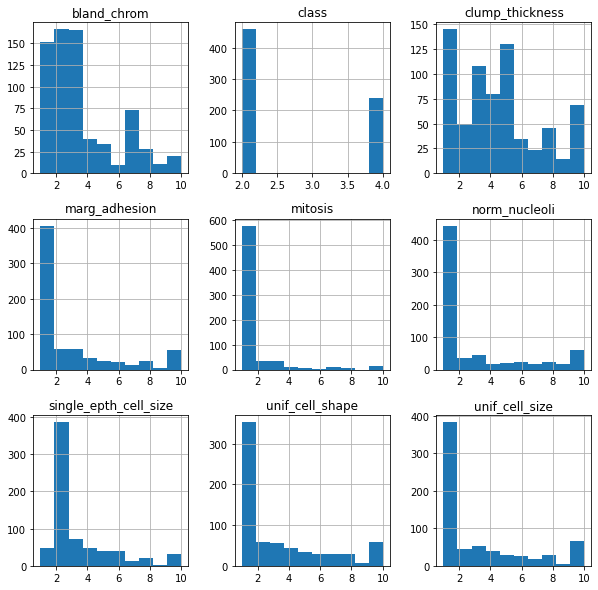

In [5]:
#plot histogram for each feature
df.hist(figsize=(10,10))
plt.show()

## Analysing the feature parameters of malignant cancer

In [6]:
df[df['class']==4].head(10)

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epth_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitosis,class
5,8,10,10,8,7,10,9,7,1,4
12,5,3,3,3,2,3,4,4,1,4
14,8,7,5,10,7,9,5,5,4,4
15,7,4,6,4,6,1,4,3,1,4
18,10,7,7,6,4,10,4,1,2,4
20,7,3,2,10,5,10,5,4,4,4
21,10,5,5,3,6,7,7,10,1,4
23,8,4,5,1,2,-99999,7,3,1,4
25,5,2,3,4,2,7,3,6,1,4
32,10,7,7,3,8,5,7,4,3,4


In [7]:
df[df['class']==4].describe()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epth_cell_size,bland_chrom,norm_nucleoli,mitosis,class
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,7.195021,6.572614,6.560166,5.547718,5.298755,5.979253,5.863071,2.589212,4.0
std,2.428849,2.719512,2.562045,3.210465,2.451606,2.273852,3.350672,2.557939,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0
25%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.0
50%,8.000000,6.000000,6.000000,5.000000,5.000000,7.000000,6.000000,1.000000,4.0
75%,10.000000,10.000000,9.000000,8.000000,6.000000,7.000000,10.000000,3.000000,4.0
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.0


## Trying to correlate each feature with its class

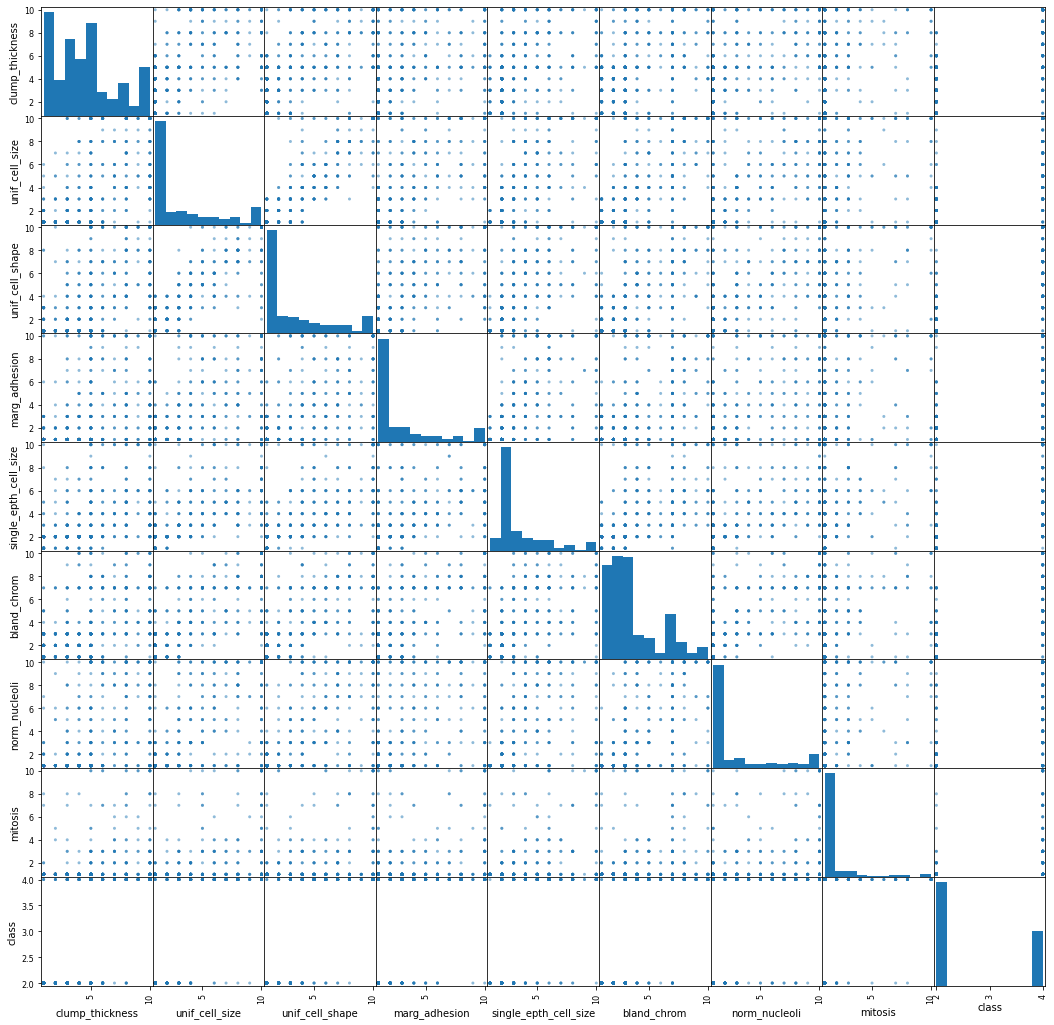

In [8]:
#create scatter plot matrix
scatter_matrix(df,figsize=(18,18))
plt.show()

## KNearest Neighbors
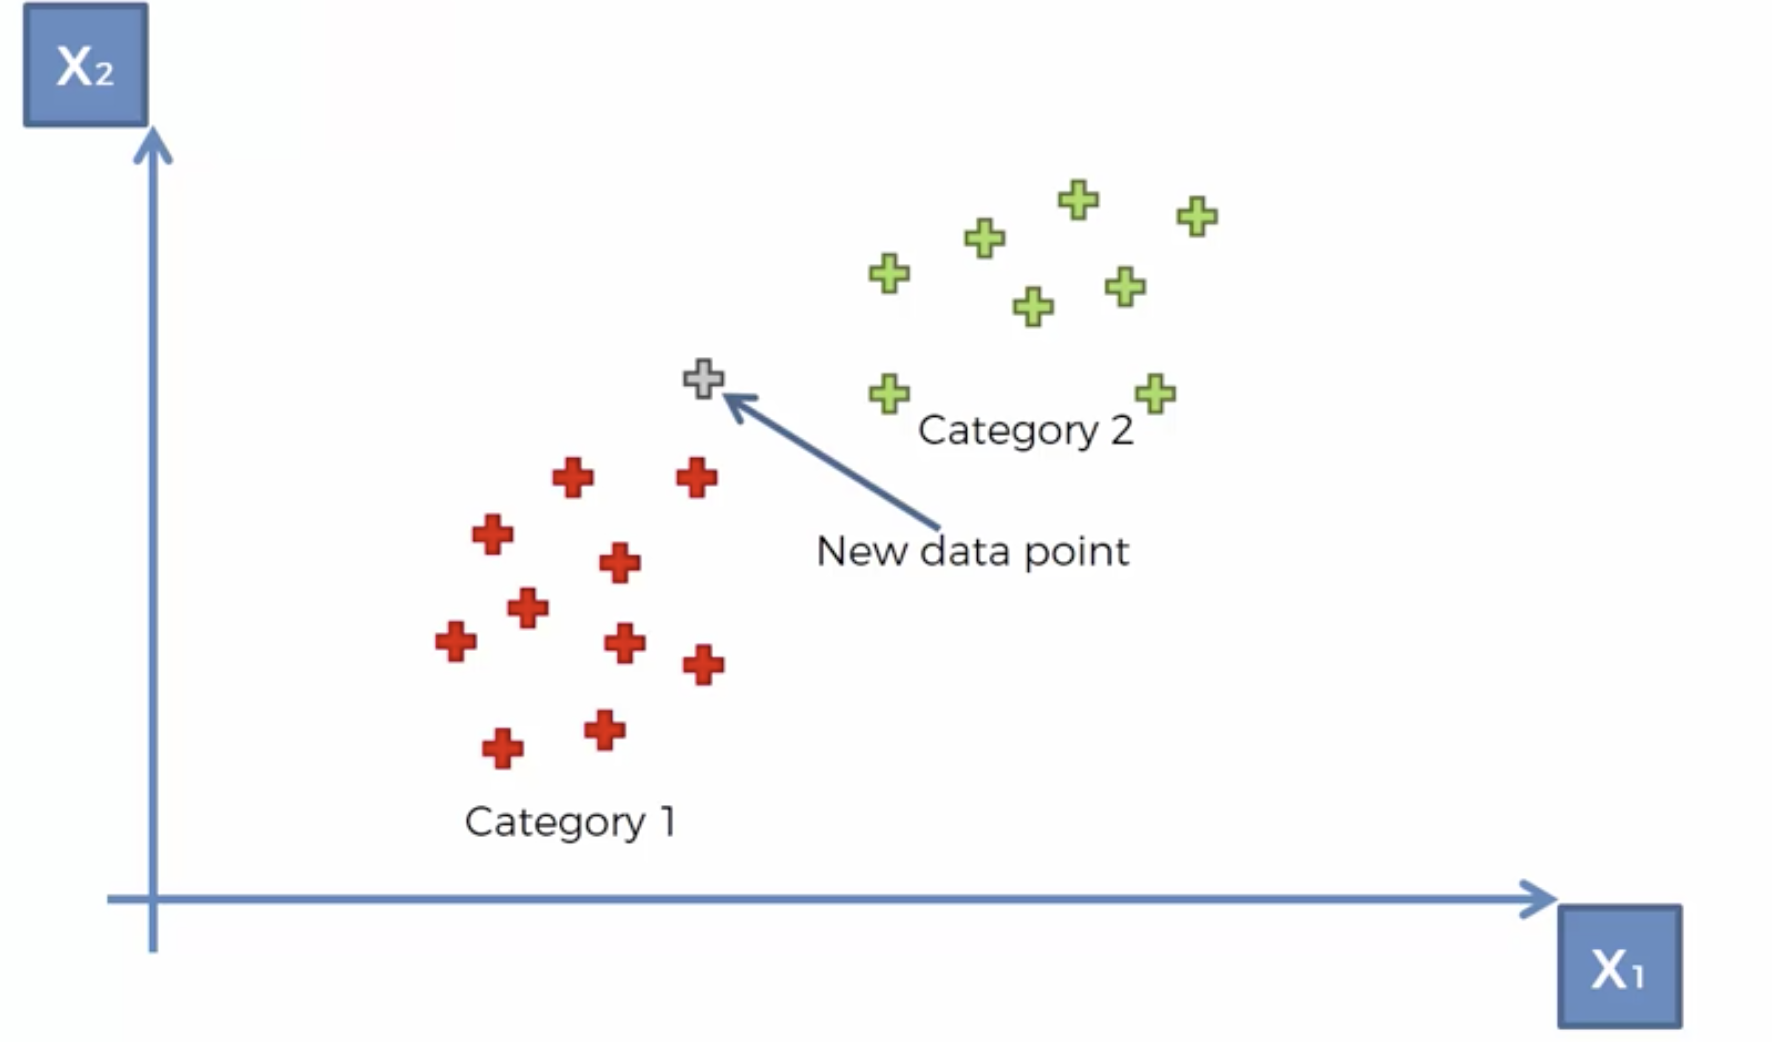

## Applying Machine Learning Algorithm on our dataset. 
### Applying KNeighbors on the data and training and testing the model

In [9]:
X = np.array(df.drop(columns = ['class']))
y = np.array(df['class'])

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

accuracy = clf.score(X_test,y_test)
print(accuracy*100)

95.71428571428572


## Testing the model on new data points

In [10]:
example_measures = np.array([[10,2,1,7,1,10,3,2,1],[1,2,1,2,3,4,5,3,1]])
#example_measures = example_measures.reshape(1,-1)
prediction = clf.predict(example_measures)
cancer_name = []
for cancer in prediction:
    if cancer == 2:
        cancer_name.append('benign(2)')
    else:
        cancer_name.append('malignant(4)')
print(cancer_name)

['malignant(4)', 'benign(2)']


## Using SVM
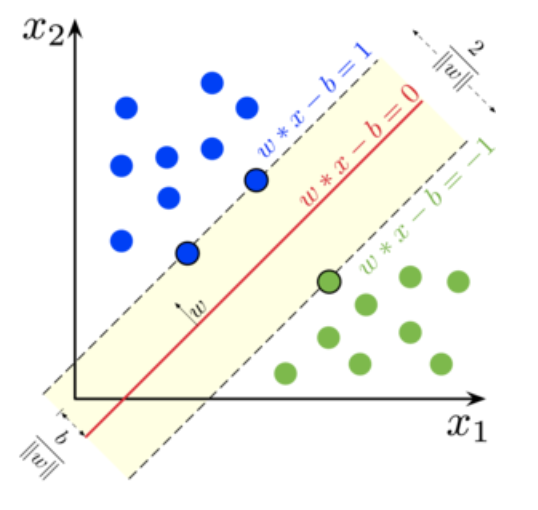

## Applying SVM on our dataset and training our model

In [11]:
# Using SVM
clf = svm.SVC(gamma = 'auto', C = 2, decision_function_shape = 'ovr')
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.95


## Testing our model on new data points

In [12]:
example_measures = np.array([[10,2,1,10,1,2,3,2,1],[1,2,1,2,3,4,5,3,1]])
#example_measures = example_measures.reshape(1,-1)
prediction = clf.predict(example_measures)
cancer_name = []
for cancer in prediction:
    if cancer == 2:
        cancer_name.append('benign(2)')
    else:
        cancer_name.append('malignant(4)')
print(cancer_name)

['malignant(4)', 'benign(2)']
